# Paper Towel Project
Use Logistic Regression Classifier to predict the quality of a paper towels!
<img src='Toilet Paper.jpg' width=300 height=300/></a>
## How it is Made? 
<a href='https://www.youtube.com/watch?v=Z74OfpUbeac'><img src='YueTube Logo.png' width=250 height=250/></a>
## Paper Towel Mechanical Properties
<a href='https://www.youtube.com/watch?v=BoDVYkW5BLA'><img src='YueTube Logo.png' width=250 height=250/></a>

# Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Import the Dataset

In [2]:
dataset=pd.read_csv('PaperTowel.csv')

In [3]:
dataset.head()

,Density,MOR,MOE,Customer Satisfaction
0,405.4034,60.9887,4261.42,Good
1,392.9937,44.7461,4156.92,Good
2,470.9295,49.8413,3993.37,Good
3,403.3186,42.1607,3279.16,Good
4,485.5602,75.6535,4777.84,Good


## Checking the Input (Features) and Output (Labels)

In [4]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
pd.DataFrame(X)

,0,1,2
0,405.4034,60.9887,4261.42
1,392.9937,44.7461,4156.92
2,470.9295,49.8413,3993.37
3,403.3186,42.1607,3279.16
4,485.5602,75.6535,4777.84
...,...,...,...
235,449.3665,77.9829,8590.07
236,439.8520,71.5830,7631.20
237,516.9763,87.2491,8853.45
238,440.9710,61.6939,5127.35


# Data Analysis

## Check Correlation between Variables

<AxesSubplot:>

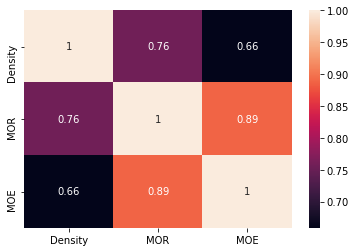

In [6]:
sb.heatmap(dataset.corr(), annot=True)

## Check for Outlies

<AxesSubplot:xlabel='Customer Satisfaction', ylabel='Density'>

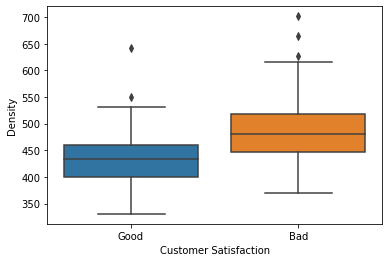

In [7]:
sb.boxplot(x='Customer Satisfaction', y='Density', data=dataset)

### Manually Remove Outliers

In [8]:
Outliers=np.where(dataset['Density']>625)
Outliers

(array([ 14, 160, 227, 228], dtype=int64),)

<AxesSubplot:xlabel='Customer Satisfaction', ylabel='Density'>

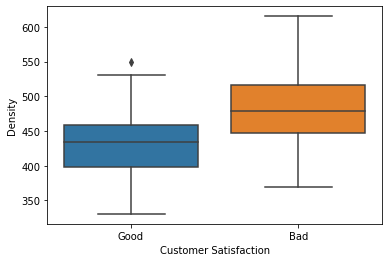

In [9]:
CleanData=dataset.drop( [14,160,227,228], inplace = False)

sb.boxplot(x='Customer Satisfaction', y='Density', data=CleanData)

### Systematically Remove Outliers
##### Click on the Image--->>
<a href='https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/'><img src='OutLiers2.jpg' width=800 height=250/></a>


## Distributions

<AxesSubplot:xlabel='Density', ylabel='Count'>

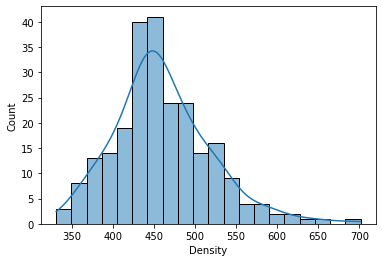

In [10]:
sb.histplot(dataset['Density'], kde=True, bins=20)

## Check Distribution between each Pair of Features

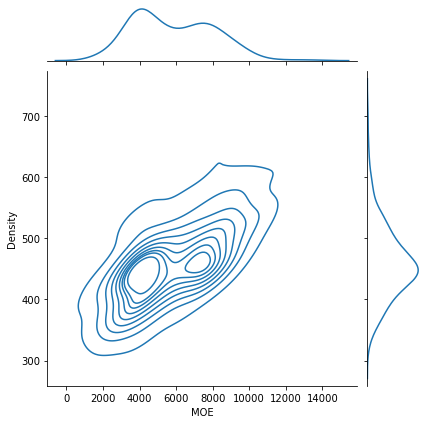

In [11]:
sb.jointplot(x='MOE' , y='Density' , data=dataset, kind='kde')

### Check Correlation and Distribution between each Pair of Features

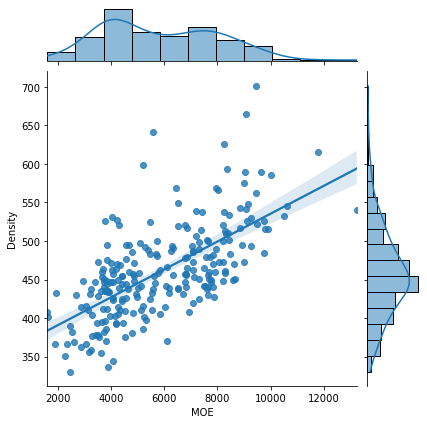

In [12]:
sb.jointplot(x='MOE' , y='Density' , data=dataset, kind='reg')

# Data Preprocessing

## Categorical Data

In [13]:
from sklearn.preprocessing import LabelEncoder
LaEnc = LabelEncoder()
y = LaEnc.fit_transform(y)

## Splitting the Dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #, random_state = 0

In [15]:
X_train.shape

(192, 3)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.95199322,  0.74961216,  1.07171281],
       [-0.74812167, -0.12959564,  0.09470544],
       [ 1.02685149,  1.82824864,  1.77142593],
       [-1.20700502, -0.90488587, -0.91854696],
       [ 1.01063446,  0.7231724 , -0.16062679],
       [ 1.33736561,  1.74332324,  2.16032358],
       [ 0.42325382,  0.71632411,  0.56465298],
       [-0.53305762, -0.76352333, -0.3808749 ],
       [ 1.11091476,  0.4180773 , -0.81029072],
       [-0.41095606, -0.67536174, -0.92829932],
       [ 0.29582356,  0.49792505,  0.45833004],
       [ 0.01553463, -0.7902137 , -0.80800959],
       [-0.32257058,  0.1009255 ,  0.44794529],
       [ 0.14040565, -0.28095005, -0.71955169],
       [-1.3655125 , -1.36556858, -1.03875538],
       [ 0.39166381,  0.51758734, -0.4726664 ],
       [ 1.37688976,  1.83165372,  1.49877072],
       [ 2.63354842,  1.05797069,  1.08913066],
       [-0.81341343, -1.36912076, -1.2236935 ],
       [ 0.22613474, -0.49934366, -0.90672577],
       [-0.47347996,  0.56479536,  0.400

## Logistic Regression Classifier

In [18]:
from sklearn.linear_model import LogisticRegression
LogitReg = LogisticRegression()
LogitReg.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred=LogitReg.predict(X_test)

## Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[25  3]
 [ 0 20]]
Your Model Accuracy is= 93.75 %


## Checking the Probability of Good or bad for a New Paper Towel

In [21]:
# Suppose you have done your measurements of Density, MOR, and MOE of the new paper as:

New_Paper=[[405, 60, 4261]]
#New_Paper=[[526, 97, 9095]]



New_Paper = sc.transform(New_Paper)

Probability=LogitReg.predict_proba(New_Paper)

print("Chance of this towel being Good is ", 100*Probability[0,1], "%" )

Chance of this towel being Good is  87.86203625152325 %


##### <font color='red'> Now that you find a good towel paper, try to answer this mystery! Which way is correct?
<a href='https://news.yahoo.com/right-way-to-hang-toilet-roll-getting-wrong-harmful-115507518.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAN2ywJoAN6igScG6vxr0O9Pq-0BmpjwLY_0RXzgtXUDAOmnevWNv4_dS3wcP_pQAu2VJ3ZuCO_EyAyUpcT8xtDSQCSPE5orjcSwFoTOpV43Bt3s6oFP8mItBHvIEzlgcLSSaYSE9CDqmuaDQteIvKy2nxvKBpRZt-YHKeNAcMLxv'><img src='OverUnder.jpg' width=800 height=250/></a>